In [5]:
import os
import numpy as np
import json
import matplotlib.pyplot as plt
import os.path as osp
train_root = '/home/xiongpan/dataset/flaw-detection/tile_round1_train_20201231/'
json_path = osp.join(train_root,'train_annos.json')
annotations_origin = json.load(open(json_path))
annotations_origin[0]

{'name': '223_89_t20201125085855802_CAM3.jpg',
 'image_height': 3500,
 'image_width': 4096,
 'category': 4,
 'bbox': [1702.79, 2826.53, 1730.79, 2844.53]}

# 将原始标注转化为coco格式的标注

100%|██████████| 15230/15230 [00:03<00:00, 4253.66it/s]


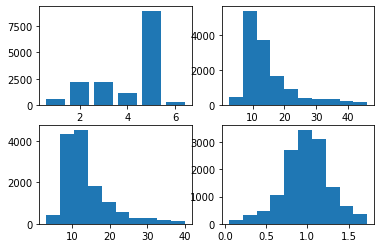

5388
15230


In [28]:
from tqdm import tqdm
coco_content = {}
images = []
annotations = []
categories = [
    {
        'id':1,
        'name':'edge'
    },
    {
        'id':2,
        'name':'angle'
    },
    {
        'id':3,
        'name':'white_point'
    },
    {
        'id':4,
        'name':'shallow_color'
    },
    {
        'id':5,
        'name':'deep_color'
    },
    {
        'id':6,
        'name':'aperture'
    }
    
]
coco_content['categories'] = categories
# {
#   "0": "背景",
#   "1": "边异常",
#   "2": "角异常",
#   "3": "白色点瑕疵",
#   "4": "浅色块瑕疵",
#   "5": "深色点块瑕疵",
#   "6": "光圈瑕疵"
#  }
image_ids = set()
class_statics = {}
width_statics = []
height_statics = []
ratio_statics = []
for ann_origin in annotations_origin:
    image_ids.add(ann_origin['name'])
image_ids = list(image_ids)
for ann_id,ann_origin in enumerate(tqdm(annotations_origin)):
    im = {}
    ann = {}
    bbox_origin = ann_origin['bbox']
    image_id = image_ids.index(ann_origin['name'])
    bbox = [bbox_origin[0],bbox_origin[1],bbox_origin[2]-bbox_origin[0],bbox_origin[3]-bbox_origin[1]]
    if not ann_origin['category'] in class_statics.keys():
        class_statics[ann_origin['category']] = 1
    else:
        class_statics[ann_origin['category']] +=1
    #添加图片相关信息
    im['file_name'] = ann_origin['name']
    im['width'] = ann_origin['image_width']
    im['height'] = ann_origin['image_height']
    im['id'] = image_id
    if(im not in images):
        images.append(im.copy())
    #添加标注相关信息
    ann['id']  = ann_id
    ann['image_id'] = image_id
    ann['category_id'] = ann_origin['category']
    ann['bbox'] = bbox
    ann['area'] = bbox[2]*bbox[3]
    annotations.append(ann.copy())
    width_statics.append(bbox[2])
    height_statics.append(bbox[3])
    ratio_statics.append(bbox[2]/bbox[3])
plt.subplot(2,2,1)
plt.bar(list(class_statics.keys()),list(class_statics.values()))
plt.subplot(2,2,2)
width_statics.sort()
plt.hist(width_statics[:int(0.9*len(width_statics))],10)
plt.subplot(2,2,3)
height_statics.sort()
plt.hist(height_statics[:int(0.9*len(height_statics))],10)
plt.subplot(2,2,4)
ratio_statics.sort()
plt.hist(ratio_statics[:int(0.9*len(ratio_statics))],10)
plt.show()
coco_content['images'] = images
coco_content['annotations'] = annotations
save_path = osp.join(train_root,'coco_anno.json')
with open(save_path,'w') as f:
    json.dump(coco_content,f,indent=6)
print(len(images))
print(len(annotations))